# Fuel Efficiency Machine Learning Project

In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('auto-mpg.csv')

In [76]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### We can drop the 'car name' column as it won't have any importance on our model as well as encoding it is unnecessary.

In [77]:
df = df.drop('car name', axis = 1)

## Exploratory Data Analysis

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [79]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
for i in df[['cylinders', 'model year', 'origin']].columns:
    values = df[i].value_counts()
    print(values)
    print('***'* 10)

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
******************************
model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64
******************************
origin
1    249
3     79
2     70
Name: count, dtype: int64
******************************


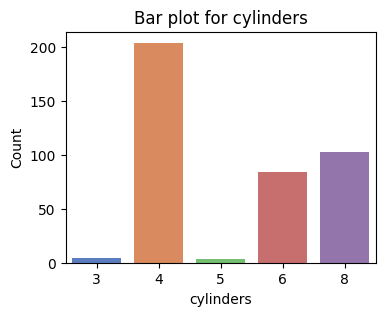

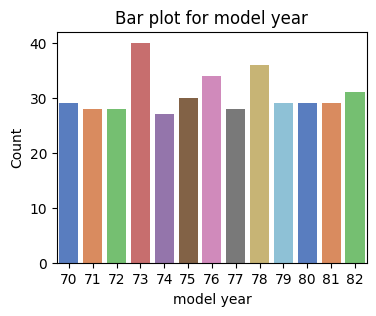

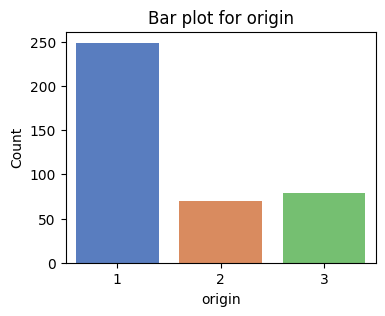

In [82]:
columns = ['cylinders', 'model year', 'origin']
for i, v in enumerate(columns):
    values = df[v].value_counts()
    dataframe = pd.DataFrame({v: values.index, 'count': values.values})
    plt.figure(figsize=(4, 3))
    sns.barplot(x=v, y='count', data=dataframe, palette='muted')
    plt.title(f'Bar plot for {v}')
    plt.xlabel(v)
    plt.ylabel('Count')
    plt.show()

### We have large class imbalances in the 'cylinders' and 'origin' columns. We will need to oversample the minority classes later in Data Preproccessing.

## Outlier Visualzation:

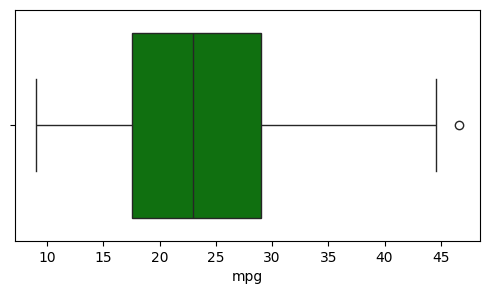

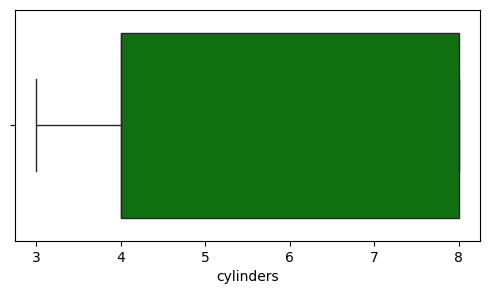

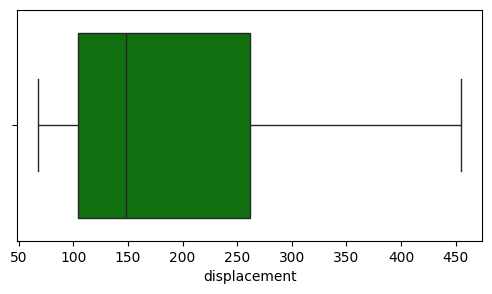

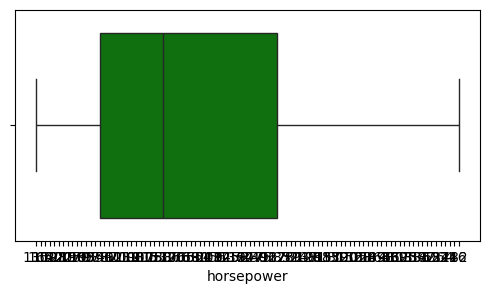

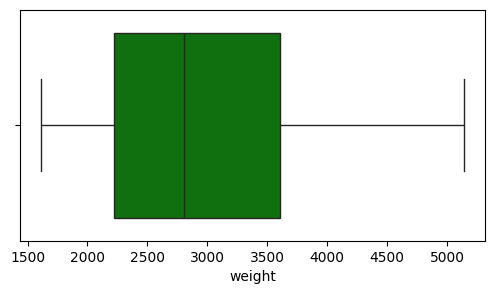

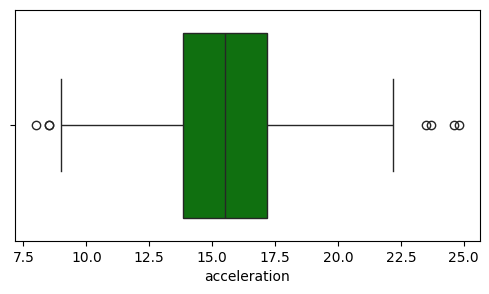

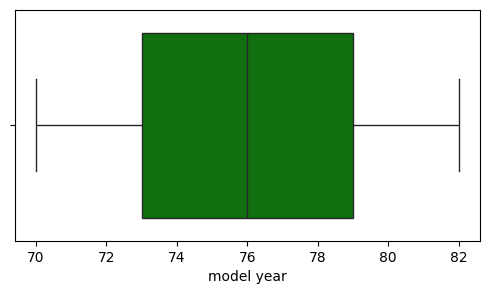

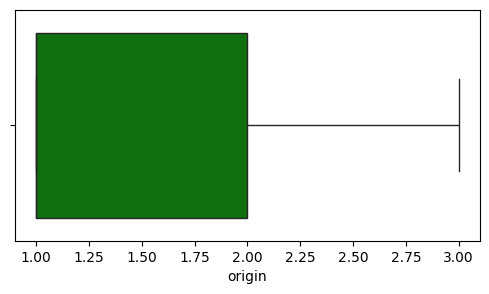

In [83]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=i, color='Green')
    plt.show()

### We only have outliers in the 'acceleration' column. We will define a function to handle this called "whisker".

In [84]:
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr #left whisker
    rw = q3 + 1.5 * iqr #right whisker
    return lw, rw

In [85]:
lw, rw = whisker(df['acceleration'])
df['acceleration'] = np.where(df['acceleration'] < lw, lw, df['acceleration']) # if acceleration is less than lw then replace with lw or leave as the current value.
df['acceleration'] = np.where(df['acceleration'] > rw, rw, df['acceleration']) # if acceleration is greater than rw then replace with rw or leave as the current value.

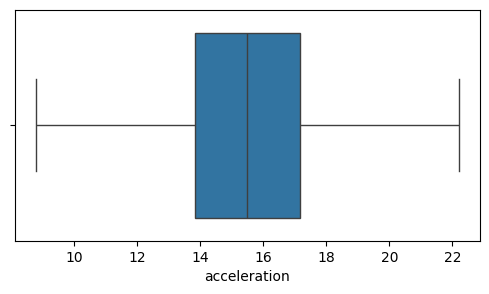

In [86]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='acceleration')
plt.show()

### Outliers have been taken care of

In [87]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### As we can see above, there is a '?' in our data, this will prevent us from performing any further analysis. We will impute this value with the mean.

In [88]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
horsepower_mean = df['horsepower'].mean()
df['horsepower'].replace('?', horsepower_mean, inplace=True)

## Feature Correlation and Reduction:

### Data Correlation using Heatmap:

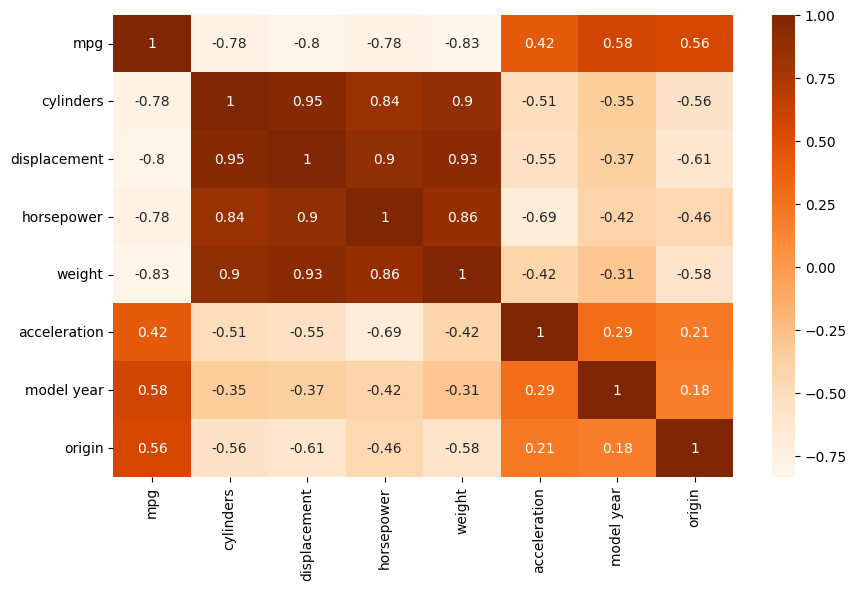

In [89]:
corr = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='Oranges')
plt.show()

#### There are a few very strong positive and negative correlations in our dataset. While it is a rather small dataset, we will still have remove some features to prevent a high collinearity from overfitting our model/s later on. From what I have analyzed, the 'displacement' feature has a very high collinearity with other features as well as having a strong negative correlation with our target variable 'mpg'. We can drop this feature from our dataset.

In [90]:
df = df.drop('displacement', axis= 1)

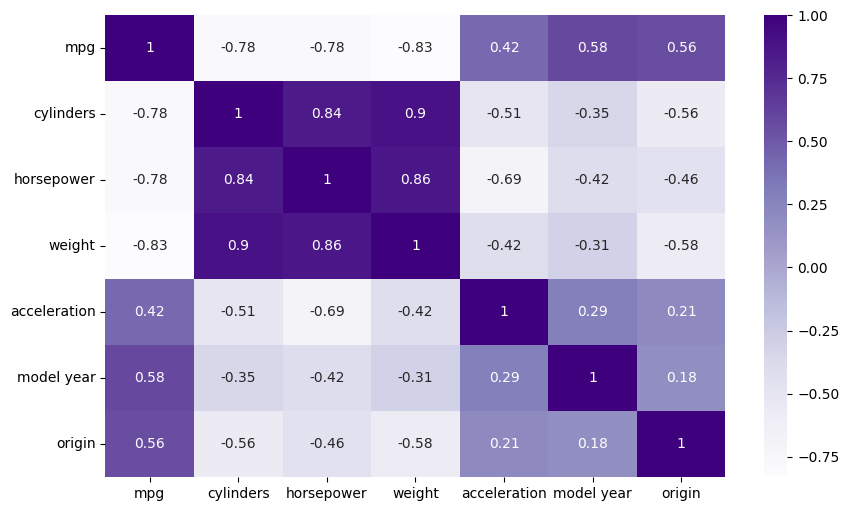

In [91]:
corr = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.show()

#### When analyzing further, the 'cylinders' and 'weight' features also have high multicollinearity with each other and other features. The 'weight' feature has a higher correlation with the horsepower feature than 'cylinders' so we can drop the 'weight' feature.

In [92]:
df = df.drop('weight', axis= 1)

## Machine Learning Model Building and Implementation:

In [93]:
df.columns

Index(['mpg', 'cylinders', 'horsepower', 'acceleration', 'model year',
       'origin'],
      dtype='object')

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['cylinders', 'horsepower', 'acceleration', 'model year', 'origin']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [105]:
missing_values_count = np.isnan(X_train_scaled).sum()
print(missing_values_count)

5


### When scaling the data, there seems to have been NaN values that have been created so will need to handle this.

In [106]:
column_means = np.nanmean(X_train_scaled, axis=0)

# Find the indices of NaN values
nan_indices = np.isnan(X_train_scaled)

# Replace NaN values with the mean of the corresponding column
X_train_scaled[nan_indices] = np.take(column_means, nan_indices[1])

In [110]:
column_means = np.nanmean(X_test_scaled, axis=0)

# Find the indices of NaN values
nan_indices = np.isnan(X_test_scaled)

# Create a mask of the same shape as X_test_scaled
mask = np.zeros_like(X_test_scaled, dtype=bool)
mask[nan_indices] = True

# Replace NaN values with the mean of the corresponding column
X_test_scaled[mask] = np.take(column_means, np.nonzero(mask)[1])

In [117]:
missing_values_count1 = np.isnan(X_train_scaled).sum()
missing_values_count2 = np.isnan(X_test_scaled).sum()
print(missing_values_count1)
print(missing_values_count2)

0
0


## We will use Linear Regression as our baseline model and then compare it a against some more advanced models like a Decision Tree Regressor and Gradient Boosting Regressor.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

### Multiple Linear Regression:

In [130]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
score1 = r2_score(y_pred, y_test)
mse1 = mean_squared_error(y_pred, y_test)
mae1 = mean_absolute_error(y_pred, y_test)
rmse1 = sqrt(mean_squared_error(y_pred, y_test))

print(score1)
print(mse1)
print(mae1)
print(rmse1)

0.662223392802155
15.660733615101599
2.9578871400690314
3.9573644784252053


### Decision Tree Regressor:

In [131]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
score2 = r2_score(y_pred, y_test)
mse2 = mean_squared_error(y_pred, y_test)
mae2 = mean_absolute_error(y_pred, y_test)
rmse2 = sqrt(mean_squared_error(y_pred, y_test))

print(score2)
print(mse2)
print(mae2)
print(rmse2)

0.6972781889170243
16.46891666666667
2.9558333333333335
4.058191304838483


### Gradient Boosting Regressor:

In [132]:
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
score3 = r2_score(y_pred, y_test)
mse3 = mean_squared_error(y_pred, y_test)
mae3 = mean_absolute_error(y_pred, y_test)
rmse3 = sqrt(mean_squared_error(y_pred, y_test))

print(score3)
print(mse3)
print(mae3)
print(rmse3)

0.7580091389638205
11.857968159427498
2.496313346295301
3.4435400621203027


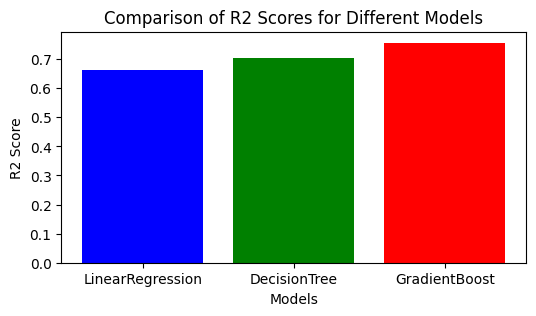

In [127]:
models = ['LinearRegression', 'DecisionTree', 'GradientBoost']

# R2 scores corresponding to each model
scores = [score1, score2, score3]

plt.figure(figsize=(6, 3))
plt.bar(models, scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.show()

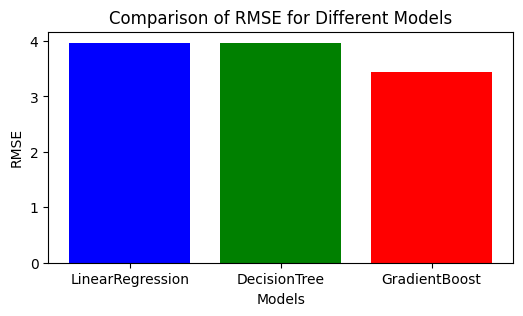

In [128]:
models = ['LinearRegression', 'DecisionTree', 'GradientBoost']

# RMSE values corresponding to each model
rmses = [rmse1,rmse2,rmse3]

plt.figure(figsize=(6, 3))
plt.bar(models, rmses, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.show()

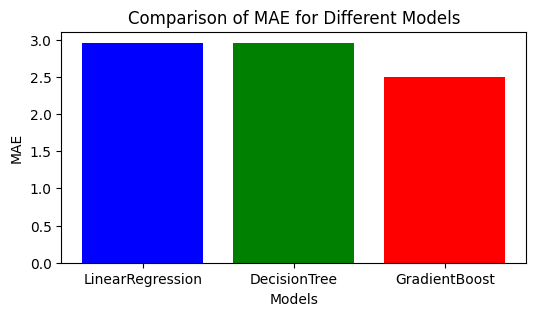

In [134]:
models = ['LinearRegression', 'DecisionTree', 'GradientBoost']

# MAE values corresponding to each model
maes = [mae1, mae2, mae3]

plt.figure(figsize=(6, 3))
plt.bar(models, maes, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Models')
plt.show()

# Overall the Gradient Boosting Regressor performs the best out of all 3 models.